In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import plotly.express as px
import plotly.graph_objects as go 
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA 
import statsmodels.api as sm 

data = pd.read_csv("dat.csv")
data.head()

,Date,Views
0,01/06/2021,7831
1,02/06/2021,7798
2,03/06/2021,7401
3,04/06/2021,7054
4,05/06/2021,7973


In [5]:
data.Date = pd.to_datetime(data.Date, format='%d/%m/%Y')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    391 non-null    datetime64[ns]
 1   Views   391 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.2 KB


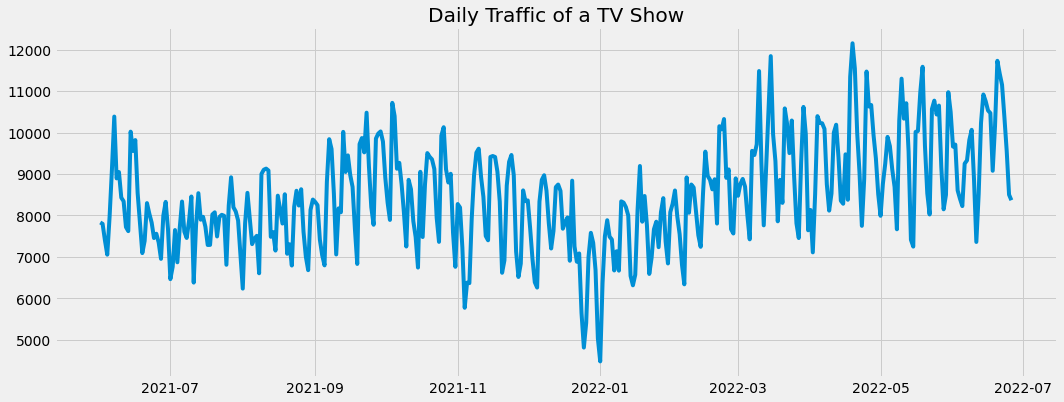

In [9]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,6))
plt.plot(data.Date, data.Views)
plt.title('Daily Traffic of a TV Show')
plt.show()

<Figure size 432x288 with 0 Axes>

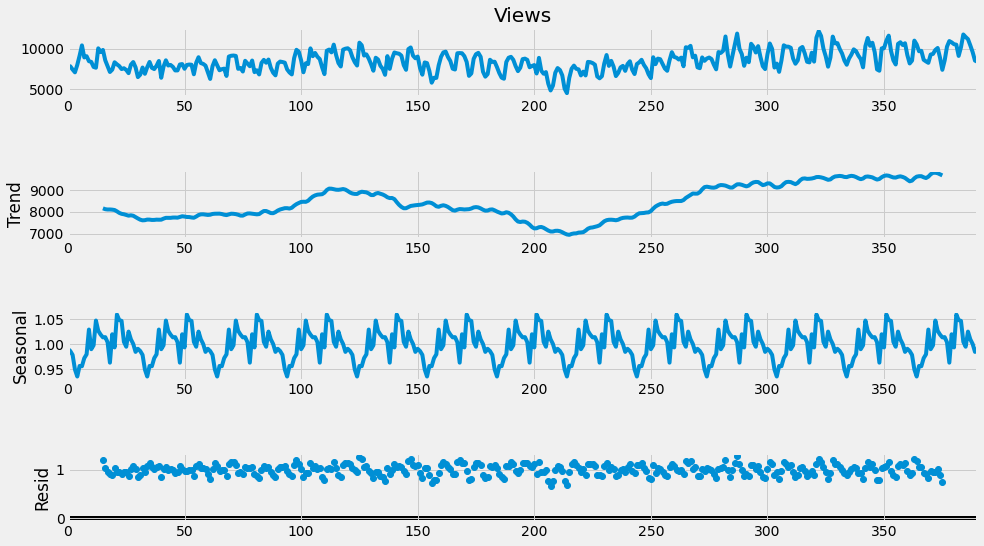

In [16]:
result = seasonal_decompose(data.Views, model='multiplicative', period=30)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(16,9)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

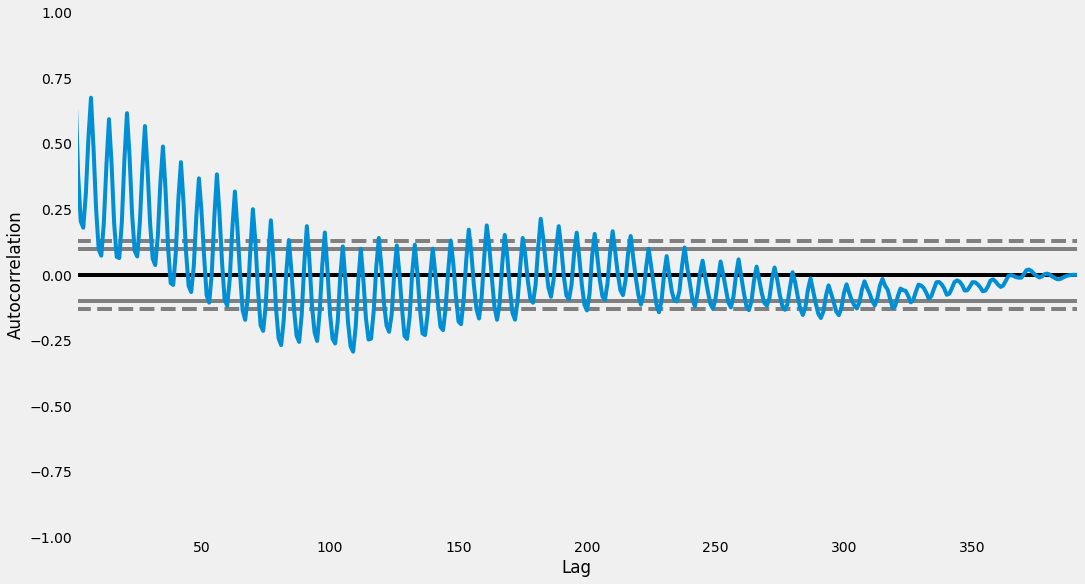

In [18]:
plt.figure(figsize=(16,9))
pd.plotting.autocorrelation_plot(data.Views)

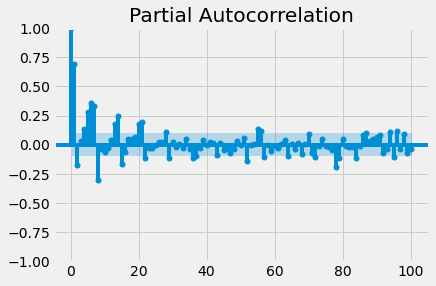

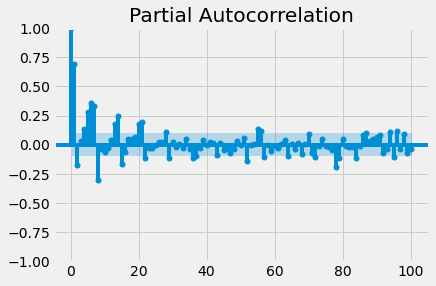

In [22]:
plot_pacf(data.Views, lags=100)

In [23]:
### TRAIN a sARIMA MODEL ###
p, d, q= 5, 1, 2
model = sm.tsa.statespace.SARIMAX(data.Views, order=(p,d,q), seasonal_order=(p, d, q, 12))
model = model.fit()
model.summary()

c:\Users\ramaz\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\ramaz\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Views   No. Observations:                  391
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood               -3098.967
Date:                            Mon, 18 Jul 2022   AIC                           6227.934
Time:                                    15:18:51   BIC                           6286.958
Sample:                                         0   HQIC                          6251.360
                                            - 391                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7707      0.131      5.904      0.000       0.515       1.027
ar.L2         -0.7945      0.136     -5.859      0.000      -1.060      -0.529
ar.L3         -0.1393      0.172     -0.809      0.419      -0.477       0.198
ar.L4         -0.1986      0.153     -1.301      0.193      -0.498       0.101
ar.L5         -0.1493      0.138     -1.085      0.278      -0.419       0.120
ma.L1         -1.1753      0.085    -13.800      0.000      -1.342      -1.008
ma.L2          0.9000      0.072     12.456      0.000       0.758       1.042
ar.S.L12      -0.2506      4.118     -0.061      0.951      -8.321       7.820
ar.S.L24       0.0586      0.519      0.113      0.910      -0.960       1.077
ar.S.L36      -0.1716      0.279     -0.616      0.538      -0.718       0.375
ar.S.L48      -0.2025      0.804     -0.252      0.801      -1.778       1.373
ar.S.L60       0.0115      0.815      0.014      0.989      -1.586       1.609
ma.S.L12      -0.6911      4.118     -0.168      0.867      -8.762       7.379
ma.S.L24      -0.1325      3.402     -0.039      0.969      -6.801       6.536
sigma2      1.257e+06   1.51e-05   8.31e+10      0.000    1.26e+06    1.26e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.26
Prob(Q):                              0.99   Prob(JB):                         0.53
Heteroskedasticity (H):               1.06   Skew:                             0.14
Prob(H) (two-sided):                  0.76   Kurtosis:                         3.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.33e+28. Standard errors may be unstable.
"""

In [27]:
predictions = model.predict(len(data), len(data)+100)
predictions

391     9883.901386
392    10796.963302
393    10719.353136
394     9839.954669
395     8784.834137
           ...     
487     9531.766342
488     9873.291460
489    10762.839670
490    11173.804440
491    11090.600327
Name: predicted_mean, Length: 101, dtype: float64

<AxesSubplot:>

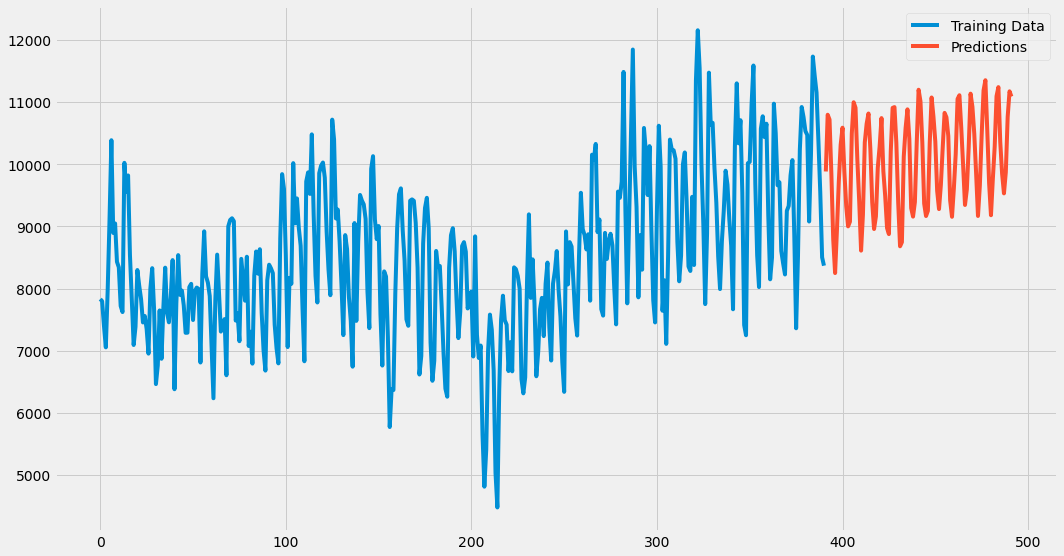

In [29]:
data.Views.plot(legend=True, label='Training Data', figsize=(16,9))
predictions.plot(legend=True, label='Predictions')